In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [21]:
# lebel encoding
def label_encode_categorical_columns(data, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        if column in data.columns:
            data[column] = label_encoder.fit_transform(data[column])
    return data

# Feature Scaling
def feature_scale_data(data, columns_for_scale):
    # Create a StandardScaler object
    scaler = MinMaxScaler()
    
    # Scale the numerical columns
    data[columns_for_scale] = scaler.fit_transform(data[columns_for_scale])
    
    return data

# Handling Outliers
def handle_outliers(data,columns):
    data_transformed = data.copy()
    data_transformed[columns] = np.log1p(data_transformed[columns])
    return data_transformed





# Splitting the Data
def split_data(data, target_col):
    # Assuming 'target_col' is the name of the target column
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)
    return X_train, X_test, y_train, y_test

# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [22]:
data = pd.read_csv('Breast_Cancer.csv', index_col=False,)

data.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [23]:
# Step 2: Encode categorical variables with lebel encoder


categorical_columns = ['Race','N Stage', 'T Stage ','A Stage','differentiate','Marital Status', '6th Stage', 'Grade', 'Estrogen Status', 'Progesterone Status', 'Status']
data = label_encode_categorical_columns(data, categorical_columns)
data = pd.get_dummies(data, columns= [])
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [24]:
# Step 3: Scale features with minmax scaling
columns_to_scaled = ['Age','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']
data = feature_scale_data(data,columns_to_scaled)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.974359,2,1,0,0,0,1,3,1,0.021583,1,1,0.383333,0.000000,0.556604,0
1,0.512821,2,1,1,1,2,0,2,1,0.244604,1,1,0.216667,0.088889,0.575472,0
2,0.717949,2,0,2,2,4,0,2,1,0.446043,1,1,0.216667,0.133333,0.698113,0
3,0.717949,2,1,0,0,0,1,3,1,0.122302,1,1,0.016667,0.000000,0.783019,0
4,0.435897,2,1,1,0,1,1,3,1,0.287770,1,1,0.033333,0.000000,0.462264,0


In [25]:
#handle outlier with log transform
columns_to_transform = ['Age','Race','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months','N Stage', 'A Stage','differentiate','Marital Status', '6th Stage', 'Grade', 'Estrogen Status', 'Progesterone Status' ]
data = handle_outliers(data,columns_to_transform)
data.head()



,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.680244,1.098612,0.693147,0,0.000000,0.000000,0.693147,1.386294,0.693147,0.021353,0.693147,0.693147,0.324496,0.000000,0.442506,0
1,0.413976,1.098612,0.693147,1,0.693147,1.098612,0.000000,1.098612,0.693147,0.218818,0.693147,0.693147,0.196115,0.085158,0.454555,0
2,0.541131,1.098612,0.000000,2,1.098612,1.609438,0.000000,1.098612,0.693147,0.368831,0.693147,0.693147,0.196115,0.125163,0.529518,0
3,0.541131,1.098612,0.693147,0,0.000000,0.000000,0.693147,1.386294,0.693147,0.115382,0.693147,0.693147,0.016529,0.000000,0.578308,0
4,0.361790,1.098612,0.693147,1,0.000000,0.693147,0.693147,1.386294,0.693147,0.252912,0.693147,0.693147,0.032790,0.000000,0.379986,0


In [26]:
#Train and Test Split
output = 'Status'
X_train, X_test, y_train, y_test = split_data(data, output)


Training Accuracy:  0.9105312208760484
Testing Accuracy:  0.8968944099378882
Accuracy: 0.8968944099378882
Classification report
[[660  22]
 [ 61  62]]
0.8968944099378882
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       682
           1       0.74      0.50      0.60       123

    accuracy                           0.90       805
   macro avg       0.83      0.74      0.77       805
weighted avg       0.89      0.90      0.89       805



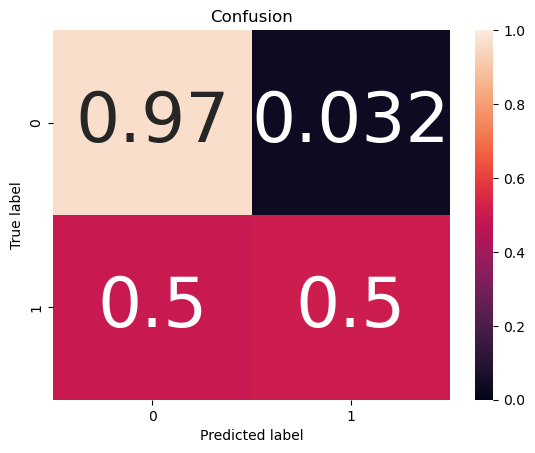

In [27]:

# create Svc model 
# Create an instance of the svc

adboost = AdaBoostClassifier(n_estimators=100,learning_rate=.5)

#train model
adboost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adboost.predict(X_test)

#  Training Accuracy
print("Training Accuracy: ", adboost.score(X_train, y_train)) # Return the mean accuracy on the given data and actual labels

# Test Accuracy
print("Testing Accuracy: ", adboost.score(X_test, y_test))

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report")

predictions = adboost.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=adboost.classes_, title='Confusion')

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
#learning_rate = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
#base_estimator__max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Create the random grid

random_grid = {
    'n_estimators': n_estimators,
    'learning_rate': [0.1, 0.5, 1.0],
    #'base_estimator__max_depth': base_estimator__max_depth
}


print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.5, 1.0]}


In [29]:
radaboost=AdaBoostClassifier()
# Randomized search on hyper parameters
r_adaboost_cv=RandomizedSearchCV(estimator=radaboost,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
# Controls the verbosity: the higher, the more messages
# Number of jobs to run in parallel
### fit the randomized model
r_adaboost_cv.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.9s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.9s
[CV] END ................learning_rate=0.1, n_estimators=400; total time=   1.9s
[CV] END ................learning_rate=0.1, n_estimators=400; total time=   2.0s
[CV] END ................learning_rate=0.1, n_estimators=400; total time=   1.3s
[CV] END ................learning_rate=0.1, n_estimators=600; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=600; total time=   1.0s
[CV] END ................learning_rate=0.1, n_estimators=600; total time=   1.1s
[CV] END ................learning_rate=0.1, n_estimators=800; total time=   1.4s
[CV] END ................learning_rate=0.1, n_estimators=800; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=800; total time=   1.3s
[CV] END ...............lear

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.5, 1.0],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)